In [1]:
import requests
import json
import numpy as np
import datetime
import string
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import statsmodels.graphics.tsaplots as sgt

In [2]:
# vamos a ver la relación entre temperatura y demanda

## lo haremos con la demanda por día
## crearemos una columna mean_temp con la media de las 5 columnas de temperatura
## representar la demanda y temperatura media junto con gráficos en gris de las temp de cada ciudad?

In [3]:
energy_demand_daily_temp = pd.read_csv('demanda_day_temp_resume_total.csv')
energy_demand_daily_temp.set_index("date", inplace=True)

energy_demand_daily_temp.index.freq = 'D'

In [4]:
energy_demand_daily_temp.head()

,value,weekday,working_day,madrid_temp,barcelona_temp,bilbao_temp,sevilla_temp,valencia_temp
date,,,,,,,,
2014-04-01,4193562.0,1.0,1.0,11.705113,12.544775,15.610943,16.045537,13.799412
2014-04-02,4226833.0,2.0,1.0,9.055325,13.558729,13.933221,13.375715,14.382533
2014-04-03,4227452.0,3.0,1.0,8.853174,12.537083,9.742903,12.570692,16.432439
2014-04-04,4175149.0,4.0,1.0,9.518091,14.446030,11.535740,13.031387,18.863723
2014-04-05,3702698.0,5.0,1.0,12.828484,13.215501,13.282557,15.982131,19.886288


In [5]:
## crearemos una columna mean_temp con la media de las 5 columnas de temperatura

In [6]:
energy_demand_daily_temp['mean_temp'] = energy_demand_daily_temp[
    ['madrid_temp', 'barcelona_temp', 'bilbao_temp', 'sevilla_temp', 'valencia_temp']
].mean(axis=1)

In [7]:
energy_demand_daily_temp

,value,weekday,working_day,madrid_temp,barcelona_temp,bilbao_temp,sevilla_temp,valencia_temp,mean_temp
date,,,,,,,,,
2014-04-01,4193562.0,1.0,1.0,11.705113,12.544775,15.610943,16.045537,13.799412,13.941156
2014-04-02,4226833.0,2.0,1.0,9.055325,13.558729,13.933221,13.375715,14.382533,12.861105
2014-04-03,4227452.0,3.0,1.0,8.853174,12.537083,9.742903,12.570692,16.432439,12.027258
2014-04-04,4175149.0,4.0,1.0,9.518091,14.446030,11.535740,13.031387,18.863723,13.478994
2014-04-05,3702698.0,5.0,1.0,12.828484,13.215501,13.282557,15.982131,19.886288,15.038992
...,...,...,...,...,...,...,...,...,...
2021-12-27,3686647.0,0.0,1.0,11.606002,13.531011,14.285517,17.009720,17.443636,14.775177
2021-12-28,3729169.0,1.0,1.0,9.792129,14.261092,14.133620,16.015375,16.007968,14.042037
2021-12-29,3692921.0,2.0,1.0,8.401157,13.250848,12.936356,13.320164,15.173263,12.616358


<AxesSubplot:title={'center':'Electric Demand (vs) Temperature'}, xlabel='date'>

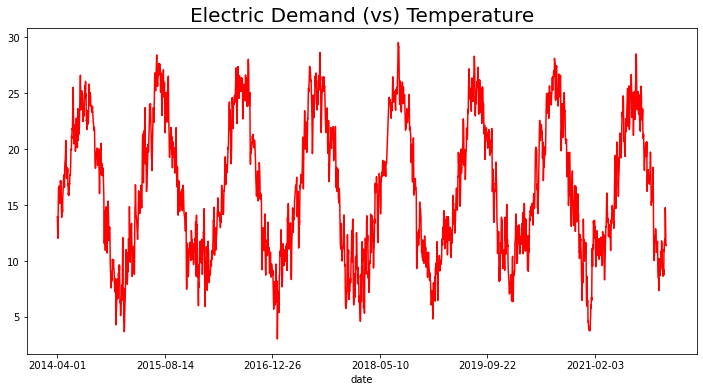

In [8]:
plt.title('Electric Demand (vs) Temperature', size = 20)
# energy_demand_daily_temp['value'].plot(color='blue', figsize=(12,6))
energy_demand_daily_temp['mean_temp'].plot(color='red', figsize=(12,6))

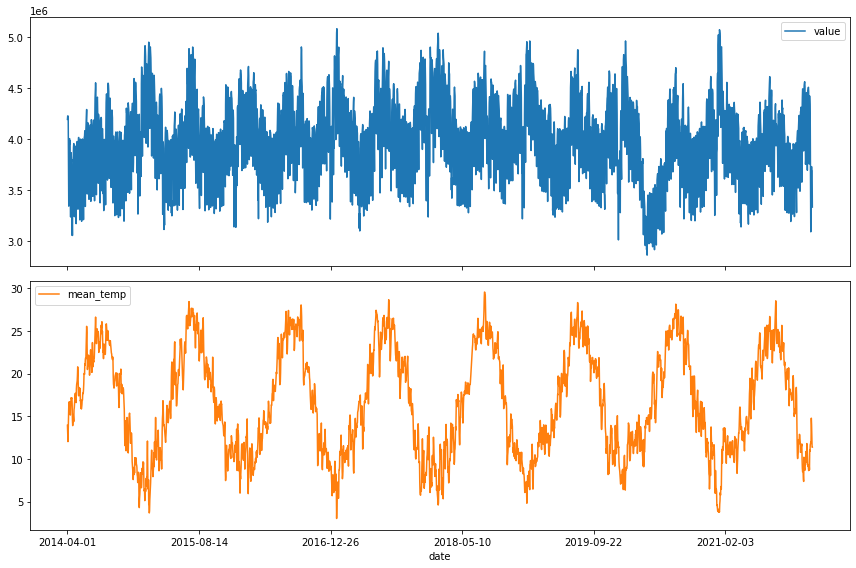

In [11]:
energy_demand_daily_temp[['value', 'mean_temp']].plot(subplots=True, figsize=(12,8))

plt.tight_layout()
plt.show()

In [19]:
# gráfico de temperatura media por año

In [37]:
energy_demand_daily_temp = pd.read_csv('demanda_day_temp_resume_total.csv')
# energy_demand_daily_temp.set_index("date", inplace=True)

# energy_demand_daily_temp.index.freq = 'D'

energy_demand_daily_temp

energy_demand_daily_temp['mean_temp'] = energy_demand_daily_temp[
    ['madrid_temp', 'barcelona_temp', 'bilbao_temp', 'sevilla_temp', 'valencia_temp']
].mean(axis=1)

energy_demand_daily_temp['year'] = pd.DatetimeIndex(energy_demand_daily_temp['date']).year
energy_demand_daily_temp['month'] = pd.DatetimeIndex(energy_demand_daily_temp['date']).month

energy_demand_daily_temp.set_index("date", inplace=True)
energy_demand_daily_temp.index.freq = 'D'


energy_demand_daily_temp

,value,weekday,working_day,madrid_temp,barcelona_temp,bilbao_temp,sevilla_temp,valencia_temp,mean_temp,year,month
date,,,,,,,,,,,
2014-04-01,4193562.0,1.0,1.0,11.705113,12.544775,15.610943,16.045537,13.799412,13.941156,2014,4
2014-04-02,4226833.0,2.0,1.0,9.055325,13.558729,13.933221,13.375715,14.382533,12.861105,2014,4
2014-04-03,4227452.0,3.0,1.0,8.853174,12.537083,9.742903,12.570692,16.432439,12.027258,2014,4
2014-04-04,4175149.0,4.0,1.0,9.518091,14.446030,11.535740,13.031387,18.863723,13.478994,2014,4
2014-04-05,3702698.0,5.0,1.0,12.828484,13.215501,13.282557,15.982131,19.886288,15.038992,2014,4
...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,3686647.0,0.0,1.0,11.606002,13.531011,14.285517,17.009720,17.443636,14.775177,2021,12
2021-12-28,3729169.0,1.0,1.0,9.792129,14.261092,14.133620,16.015375,16.007968,14.042037,2021,12
2021-12-29,3692921.0,2.0,1.0,8.401157,13.250848,12.936356,13.320164,15.173263,12.616358,2021,12


In [40]:
# group by year
energy_demand_daily_temp_2014 = energy_demand_daily_temp[energy_demand_daily_temp['year'] == 2014]
energy_demand_daily_temp_2015 = energy_demand_daily_temp[energy_demand_daily_temp['year'] == 2015]
energy_demand_daily_temp_2014

,value,weekday,working_day,madrid_temp,barcelona_temp,bilbao_temp,sevilla_temp,valencia_temp,mean_temp,year,month
date,,,,,,,,,,,
2014-04-01,4193562.0,1.0,1.0,11.705113,12.544775,15.610943,16.045537,13.799412,13.941156,2014,4
2014-04-02,4226833.0,2.0,1.0,9.055325,13.558729,13.933221,13.375715,14.382533,12.861105,2014,4
2014-04-03,4227452.0,3.0,1.0,8.853174,12.537083,9.742903,12.570692,16.432439,12.027258,2014,4
2014-04-04,4175149.0,4.0,1.0,9.518091,14.446030,11.535740,13.031387,18.863723,13.478994,2014,4
2014-04-05,3702698.0,5.0,1.0,12.828484,13.215501,13.282557,15.982131,19.886288,15.038992,2014,4
...,...,...,...,...,...,...,...,...,...,...,...
2014-12-27,3796740.0,5.0,1.0,4.643528,8.026760,10.087702,8.226332,11.203709,8.437606,2014,12
2014-12-28,3639429.0,6.0,1.0,5.157188,7.826633,6.697200,9.697330,11.287989,8.133268,2014,12
2014-12-29,4177174.0,0.0,1.0,1.873570,4.699061,2.774438,8.641364,6.476232,4.892933,2014,12


<AxesSubplot:xlabel='date'>

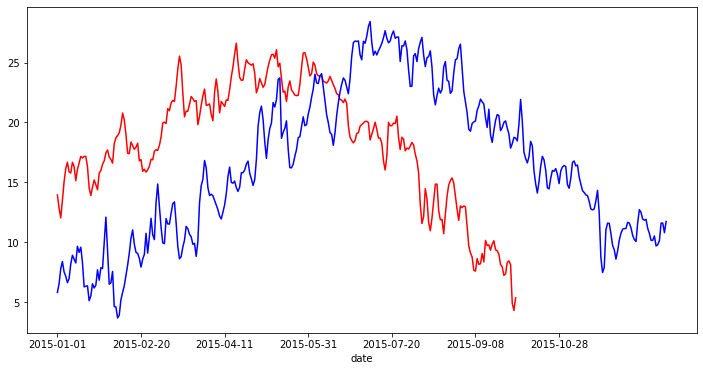

In [41]:
energy_demand_daily_temp_2014['mean_temp'].plot(color='grey', figsize=(12,6))
energy_demand_daily_temp_2015['mean_temp'].plot(color='grey', figsize=(12,6))

In [43]:
energy_demand_daily_temp = pd.read_csv('demanda_day_temp_resume_total.csv')
energy_demand_daily_temp

energy_demand_daily_temp['mean_temp'] = energy_demand_daily_temp[
    ['madrid_temp', 'barcelona_temp', 'bilbao_temp', 'sevilla_temp', 'valencia_temp']
].mean(axis=1)

energy_demand_daily_temp['year'] = pd.DatetimeIndex(energy_demand_daily_temp['date']).year
energy_demand_daily_temp['month'] = pd.DatetimeIndex(energy_demand_daily_temp['date']).month

energy_demand_daily_temp.set_index("date", inplace=True)
energy_demand_daily_temp.index.freq = 'D'


energy_demand_daily_temp

,value,weekday,working_day,madrid_temp,barcelona_temp,bilbao_temp,sevilla_temp,valencia_temp,mean_temp,year,month
date,,,,,,,,,,,
2014-04-01,4193562.0,1.0,1.0,11.705113,12.544775,15.610943,16.045537,13.799412,13.941156,2014,4
2014-04-02,4226833.0,2.0,1.0,9.055325,13.558729,13.933221,13.375715,14.382533,12.861105,2014,4
2014-04-03,4227452.0,3.0,1.0,8.853174,12.537083,9.742903,12.570692,16.432439,12.027258,2014,4
2014-04-04,4175149.0,4.0,1.0,9.518091,14.446030,11.535740,13.031387,18.863723,13.478994,2014,4
2014-04-05,3702698.0,5.0,1.0,12.828484,13.215501,13.282557,15.982131,19.886288,15.038992,2014,4
...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,3686647.0,0.0,1.0,11.606002,13.531011,14.285517,17.009720,17.443636,14.775177,2021,12
2021-12-28,3729169.0,1.0,1.0,9.792129,14.261092,14.133620,16.015375,16.007968,14.042037,2021,12
2021-12-29,3692921.0,2.0,1.0,8.401157,13.250848,12.936356,13.320164,15.173263,12.616358,2021,12


In [54]:
energy_demand_daily_temp = pd.read_csv('demanda_day_temp_resume_total.csv')
energy_demand_daily_temp

energy_demand_daily_temp['mean_temp'] = energy_demand_daily_temp[
    ['madrid_temp', 'barcelona_temp', 'bilbao_temp', 'sevilla_temp', 'valencia_temp']
].mean(axis=1)

energy_demand_daily_temp['year'] = pd.DatetimeIndex(energy_demand_daily_temp['date']).year
energy_demand_daily_temp['month'] = pd.DatetimeIndex(energy_demand_daily_temp['date']).month


energy_demand_daily_temp.set_index("date", inplace=True)
energy_demand_daily_temp.index.freq = 'D'

# extraemos los valores de cada año por mes (de enero en este caso)
# 2014:
energy_demand_daily_temp_2014 = energy_demand_daily_temp[energy_demand_daily_temp['year'] == 2014]
energy_demand_daily_temp_2014.index = pd.to_datetime(
    energy_demand_daily_temp_2014.index, 
    format = '%Y-%m-%d').strftime('%m-%d')

# 2015:
energy_demand_daily_temp_2015 = energy_demand_daily_temp[energy_demand_daily_temp['year'] == 2015]
energy_demand_daily_temp_2015.index = pd.to_datetime(
    energy_demand_daily_temp_2015.index, 
    format = '%Y-%m-%d').strftime('%m-%d')

energy_demand_daily_temp_2014

,value,weekday,working_day,madrid_temp,barcelona_temp,bilbao_temp,sevilla_temp,valencia_temp,mean_temp,year,month
date,,,,,,,,,,,
04-01,4193562.0,1.0,1.0,11.705113,12.544775,15.610943,16.045537,13.799412,13.941156,2014,4
04-02,4226833.0,2.0,1.0,9.055325,13.558729,13.933221,13.375715,14.382533,12.861105,2014,4
04-03,4227452.0,3.0,1.0,8.853174,12.537083,9.742903,12.570692,16.432439,12.027258,2014,4
04-04,4175149.0,4.0,1.0,9.518091,14.446030,11.535740,13.031387,18.863723,13.478994,2014,4
04-05,3702698.0,5.0,1.0,12.828484,13.215501,13.282557,15.982131,19.886288,15.038992,2014,4
...,...,...,...,...,...,...,...,...,...,...,...
12-27,3796740.0,5.0,1.0,4.643528,8.026760,10.087702,8.226332,11.203709,8.437606,2014,12
12-28,3639429.0,6.0,1.0,5.157188,7.826633,6.697200,9.697330,11.287989,8.133268,2014,12
12-29,4177174.0,0.0,1.0,1.873570,4.699061,2.774438,8.641364,6.476232,4.892933,2014,12


In [57]:
temp_daily_resume = pd.DataFrame()

temp_daily_resume['temp_2014'] = energy_demand_daily_temp_2014['mean_temp']
temp_daily_resume['temp_2015'] = energy_demand_daily_temp_2015['mean_temp']

temp_daily_resume['mean_value'] = temp_daily_resume.mean(numeric_only=True, axis=1)

temp_daily_resume

,temp_2014,temp_2015,mean_value
date,,,
04-01,13.941156,14.559202,14.250179
04-02,12.861105,13.899520,13.380312
04-03,12.027258,14.005325,13.016292
04-04,13.478994,13.878358,13.678676
04-05,15.038992,13.486368,14.262680
...,...,...,...
12-27,8.437606,10.131536,9.284571
12-28,8.133268,11.594115,9.863691
12-29,4.892933,11.595345,8.244139


<AxesSubplot:title={'center':'Temp'}, xlabel='date'>

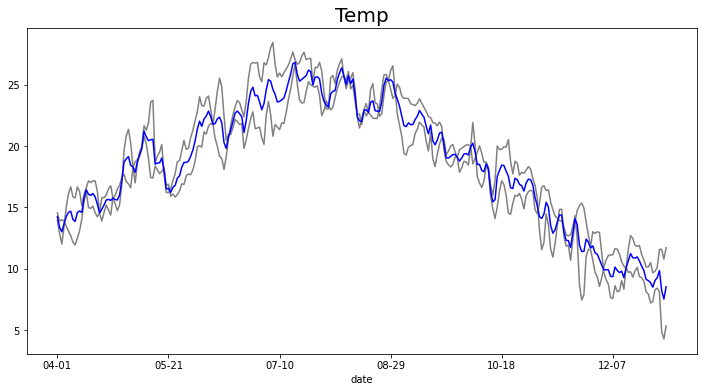

In [59]:
plt.title("Temp", size = 20)
temp_daily_resume['temp_2014'].plot(color='grey', figsize=(12,6))
temp_daily_resume['temp_2015'].plot(color='grey', figsize=(12,6))


# day_hour_means_values
temp_daily_resume['mean_value'].plot(color='blue', figsize=(12,6))

In [62]:
# demand
demand_daily_resume = pd.DataFrame()

demand_daily_resume['value_2014'] = energy_demand_daily_temp_2014['value']
demand_daily_resume['value_2015'] = energy_demand_daily_temp_2015['value']

demand_daily_resume['mean_value'] = demand_daily_resume.mean(numeric_only=True, axis=1)

demand_daily_resume


,value_2014,value_2015,mean_value
date,,,
04-01,4193562.0,3908569.0,4051065.5
04-02,4226833.0,3428810.0,3827821.5
04-03,4227452.0,3111112.0,3669282.0
04-04,4175149.0,3275511.0,3725330.0
04-05,3702698.0,3154371.0,3428534.5
...,...,...,...
12-27,3796740.0,3437467.0,3617103.5
12-28,3639429.0,3942964.0,3791196.5
12-29,4177174.0,3921714.0,4049444.0


<AxesSubplot:title={'center':'Demand'}, xlabel='date'>

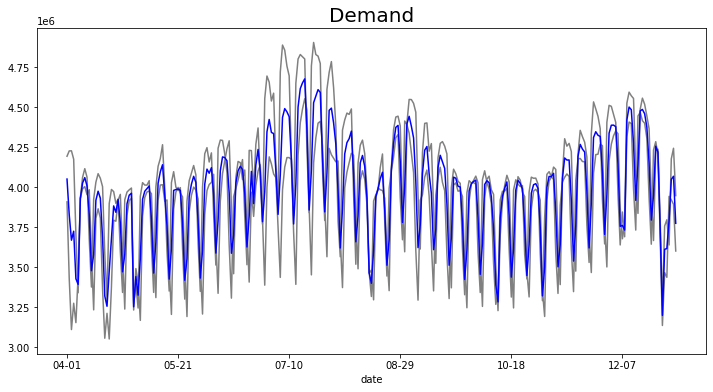

In [63]:
plt.title("Demand", size = 20)
demand_daily_resume['value_2014'].plot(color='grey', figsize=(12,6))
demand_daily_resume['value_2015'].plot(color='grey', figsize=(12,6))


# day_hour_means_values
demand_daily_resume['mean_value'].plot(color='blue', figsize=(12,6))

In [82]:
# función resumen
def prepare_demand_temp_graphs():
    years = [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]
    # load and prepare data:
    energy_demand_daily_temp = pd.read_csv('demanda_day_temp_resume_total.csv')

    energy_demand_daily_temp['mean_temp'] = energy_demand_daily_temp[
        ['madrid_temp', 'barcelona_temp', 'bilbao_temp', 'sevilla_temp', 'valencia_temp']
    ].mean(axis=1)

    energy_demand_daily_temp['year'] = pd.DatetimeIndex(energy_demand_daily_temp['date']).year
    energy_demand_daily_temp['month'] = pd.DatetimeIndex(energy_demand_daily_temp['date']).month

    energy_demand_daily_temp.set_index("date", inplace=True)
    energy_demand_daily_temp.index.freq = 'D'
    
    energy_demand_year_resume = pd.DataFrame()
    temp_year_resume = pd.DataFrame()
    for year in years:
        energy_demand_daily_year = energy_demand_daily_temp[energy_demand_daily_temp['year'] == year]
        energy_demand_daily_year.index = pd.to_datetime(
            energy_demand_daily_year.index, 
            format = '%Y-%m-%d').strftime('%m-%d')
        # temperature resume
        temp_year_resume['value_'+str(year)] = energy_demand_daily_year['mean_temp']
        
        # demand resume
        energy_demand_year_resume['value_'+str(year)] = energy_demand_daily_year['value']
        
    temp_year_resume['mean_value'] = temp_year_resume.mean(numeric_only=True, axis=1)
    energy_demand_year_resume['mean_value'] = energy_demand_year_resume.mean(numeric_only=True, axis=1)
        
    return [temp_year_resume, energy_demand_year_resume]

In [83]:
prepare_demand_temp_graphs()[0]

,value_2014,value_2015,value_2016,value_2017,value_2018,value_2019,value_2020,value_2021,mean_value
date,,,,,,,,,
04-01,13.941156,14.559202,10.524640,12.648151,12.064097,12.728053,11.133309,15.128705,12.840914
04-02,12.861105,13.899520,11.561703,12.570823,13.282579,13.021448,10.792244,14.355208,12.793079
04-03,12.027258,14.005325,12.343879,13.538183,14.053084,12.432918,11.205582,13.998219,12.950556
04-04,13.478994,13.878358,11.761269,13.872810,13.585541,10.717027,12.402114,13.435469,12.891448
04-05,15.038992,13.486368,11.943068,13.693687,13.429518,10.665275,13.864689,13.767344,13.236118
...,...,...,...,...,...,...,...,...,...
12-27,8.437606,10.131536,8.738354,10.183301,8.258661,9.711059,5.971319,14.775177,9.525877
12-28,8.133268,11.594115,9.155766,10.483279,8.756472,9.110088,8.646218,14.042037,9.990155
12-29,4.892933,11.595345,8.318433,11.394166,8.928719,8.854700,7.027532,12.616358,9.203523


In [84]:
def print_graphs(temp_or_demand):
    years = [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]
    
    if temp_or_demand == 0:
        title = 'Temperature Mean Values 2014-2021'
    if temp_or_demand == 1:
        title = 'Demand Mean Values 2014-2021'
        
    dataframe_resume = prepare_demand_temp_graphs()[temp_or_demand]
    
    plt.title(title, size = 20)
    dataframe_resume['value_2014'].plot(color='grey', figsize=(12,6))
    dataframe_resume['value_2015'].plot(color='grey', figsize=(12,6))
    dataframe_resume['value_2016'].plot(color='grey', figsize=(12,6))
    dataframe_resume['value_2017'].plot(color='grey', figsize=(12,6))
    dataframe_resume['value_2018'].plot(color='grey', figsize=(12,6))
    dataframe_resume['value_2019'].plot(color='grey', figsize=(12,6))
    dataframe_resume['value_2020'].plot(color='grey', figsize=(12,6))
    dataframe_resume['value_2021'].plot(color='grey', figsize=(12,6))
    dataframe_resume['mean_value'].plot(color='blue', figsize=(12,6))

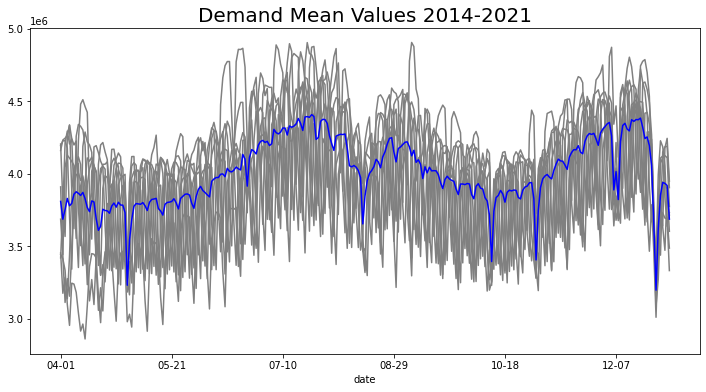

In [85]:
print_graphs(1)

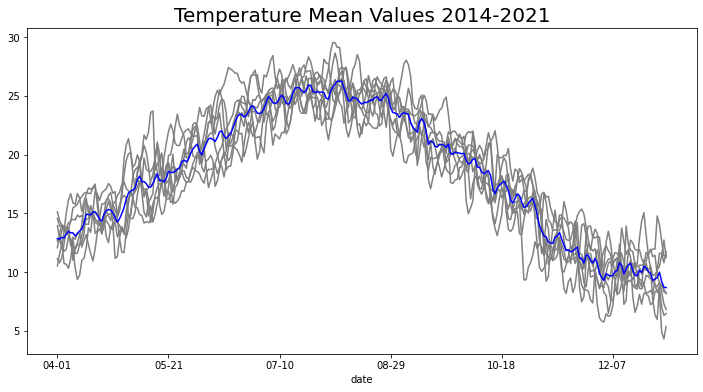

In [86]:
print_graphs(0)

In [16]:
def set_title(month):
    months = ['January', 'February', 'March', 'April', 
              'May', 'June', 'July', 'August', 
              'September', 'October', 'November', 'December']
    month_number = int(month)-1
    month_name = months[month_number]
    
    return month_name + ' Hourly Demand 2014-2021'

In [17]:
def prepare_month_dataframe(month):
    years = ['2014-', '2015-', '2016-', '2017-', '2018-', '2019-', '2020-', '2021-']
    month_year = [s + month for s in years]
    # load data:
    energy_demand_hourly = pd.read_csv('demanda_electrica_hora_weekday.csv')
    # new column date as date+hour:
    energy_demand_hourly['date'] = pd.to_datetime(energy_demand_hourly.date) + pd.to_timedelta(energy_demand_hourly.hour, unit='h')
    del energy_demand_hourly['hour']
    # convert date as index:
    energy_demand_hourly.set_index("date", inplace=True)
    # set freq as hourly:
    energy_demand_hourly = energy_demand_hourly.resample('H').first()
    energy_demand_hourly.index.freq
    # create a dataframe resume:
    energy_demand_month_resume = pd.DataFrame()
    for month in month_year:
        energy_demand_hourly_month_year = energy_demand_hourly.loc[month]
        energy_demand_hourly_month_year.index = pd.to_datetime(
            energy_demand_hourly_month_year.index, 
            format = '%Y-%m-%d').strftime('%m-%d %H')
        
        energy_demand_month_resume[month] = energy_demand_hourly_month_year['value']
        
    energy_demand_month_resume['mean_value'] = energy_demand_month_resume.mean(numeric_only=True, axis=1)
    
    return energy_demand_month_resume

In [18]:
def prepare_month_data(month):
    month_string = month
    
    energy_demand_month_resume = prepare_month_dataframe(month)
    
    plt.title(set_title(month_string), size = 20)
    energy_demand_month_resume['2014-' + month_string].plot(color='grey', figsize=(12,6))
    energy_demand_month_resume['2015-' + month_string].plot(color='grey', figsize=(12,6))
    energy_demand_month_resume['2016-' + month_string].plot(color='grey', figsize=(12,6))
    energy_demand_month_resume['2017-' + month_string].plot(color='grey', figsize=(12,6))
    energy_demand_month_resume['2018-' + month_string].plot(color='grey', figsize=(12,6))
    energy_demand_month_resume['2019-' + month_string].plot(color='grey', figsize=(12,6))
    energy_demand_month_resume['2020-' + month_string].plot(color='grey', figsize=(12,6))
    energy_demand_month_resume['2021-' + month_string].plot(color='grey', figsize=(12,6))
    energy_demand_month_resume['mean_value'].plot(color='blue', figsize=(12,6))